

https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

In [2]:
import sys, os, os.path
if not 'EXPERIMENT_HOME' in os.environ: # Configure local paths if not already defined
    ML_HOME = os.path.abspath(os.path.join("/home/jovyan", "ml_home")) # ML workspace
    EXPERIMENT_HOME = os.path.abspath(os.path.join(ML_HOME, "..")) # Experiment workspace
    DATA_HOME = os.path.abspath(os.path.join(EXPERIMENT_HOME,"dataset")) # Dataset location
    os.environ["EXPERIMENT_HOME"] = EXPERIMENT_HOME
    os.environ["DATA_HOME"] = DATA_HOME
    sys.path.insert(0, EXPERIMENT_HOME)
    sys.path.insert(0, ML_HOME) # Add to path so can load our library
    os.chdir(EXPERIMENT_HOME) # Change working directory to experiment workspace
print("Experiment Home: ", os.path.abspath(os.curdir), "; Data Home:", DATA_HOME)

Experiment Home:  /home/jovyan ; Data Home: /home/jovyan/dataset


In [3]:
from datetime import datetime
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
import xlrd
import matplotlib.pyplot as plt
from preprocessing import add_feature_set_1
%matplotlib inline


In [4]:
os.chdir("/home/jovyan/dataset/set100.data")
stocks = pd.read_csv('_directory.csv', index_col=0)
print("Stocks count:", len(stocks))
stocks.tail()

Stocks count: 150


,company_name,industry,sector,symbol
ticker,,,,
VIBHA,VIBHAVADI MEDICAL CENTER PUBLIC COMPANY LIMITED,Services,Health Care Services,VIBHA
VNG,VANACHAI GROUP PUBLIC COMPANY LIMITED,Property & Construction,Construction Materials,VNG
WHA,WHA CORPORATION PUBLIC COMPANY LIMITED,Property & Construction,Property Development,WHA
WHAUP,WHA UTILITIES AND POWER PUBLIC COMPANY LIMITED,Resources,Energy & Utilities,WHAUP
WORK,WORKPOINT ENTERTAINMENT PUBLIC COMPANY LIMITED,Services,Media & Publishing,WORK


In [6]:
df = pd.read_csv('_fs1.csv.gz') # Load FS01 dataset

In [7]:
df.tail()

,Unnamed: 0,Price,MV,VA,VO,DY,Date,Ticker,Sector,Industry,...,FF-02,FF-03,FF-04,FF-05,FF-06,FF-07,FF-08,FF-09,FF-11,FF-12
208159,208159,13.4,5916.91,43853.1,3283.1,3.36,2019-12-24,WORK,Media & Publishing,Services,...,0.014815,13.64,13.593333,13.571773,32.716036,0.2,43.668827,45.310253,-69.230803,NaN
208160,208160,13.6,6005.22,25806.5,1918.2,3.31,2019-12-25,WORK,Media & Publishing,Services,...,-0.014815,13.62,13.580000,13.581182,35.937565,0.5,42.803025,43.506496,-53.846131,NaN
208161,208161,13.9,6137.69,26514.5,1907.0,3.24,2019-12-26,WORK,Media & Publishing,Services,...,-0.021819,13.66,13.673333,13.687455,40.514878,0.5,57.575726,48.015859,-30.769270,NaN
208162,208162,14.1,6226.00,22389.9,1587.2,3.19,2019-12-27,WORK,Media & Publishing,Services,...,-0.014286,13.72,13.820000,13.824970,43.403378,0.3,73.659664,58.012805,-15.384598,NaN
208163,208163,14.0,6181.84,2242.3,159.0,3.21,2019-12-30,WORK,Media & Publishing,Services,...,0.007117,13.80,13.913333,13.883313,42.302934,0.5,81.118862,70.784751,-23.076934,NaN


In [10]:
ff = ['FF-%02d' % i for i in range(1,10)]
df_features = df[['Price','MV','VA','VO','DY'] + ff]
df_features.head()

,Price,MV,VA,VO,DY,FF-01,FF-02,FF-03,FF-04,FF-05,FF-06,FF-07,FF-08,FF-09
0,3.44,16683.99,65373.3,19045.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.42,16586.99,34585.3,10163.8,0.0,3.44,0.005831,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.54,17168.99,41467.2,11936.8,0.0,3.42,-0.034486,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.72,18041.99,92143.9,25572.0,0.0,3.54,-0.049597,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.64,17653.99,57568.1,15618.6,0.0,3.72,0.021740,3.552,3.598667,3.552,NaN,NaN,NaN,NaN


In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df_features.dropna(inplace=True)
df_features

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Price,MV,VA,VO,DY,FF-01,FF-02,FF-03,FF-04,FF-05,FF-06,FF-07,FF-08,FF-09
15,3.72,18041.99,42380.7,11393.3,0.00,3.70,-0.005391,3.784,3.756000,3.761662,59.459460,0.14,9.368185,26.080636
16,3.74,18138.99,27957.2,7404.6,0.00,3.72,-0.005362,3.756,3.741333,3.754442,60.038059,0.20,8.627442,13.831661
17,3.68,17847.99,12310.5,3339.0,0.00,3.74,0.016173,3.732,3.716000,3.729628,57.404642,0.14,11.405217,9.800281
18,3.54,17168.99,37530.4,10442.7,0.00,3.68,0.038786,3.676,3.652000,3.666419,51.731909,-0.22,9.444434,9.825697
19,3.56,17265.99,16376.1,4596.7,0.00,3.54,-0.005634,3.648,3.613333,3.630946,52.451110,-0.26,5.158725,8.669459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208159,13.40,5916.91,43853.1,3283.1,3.36,13.60,0.014815,13.640,13.593333,13.571773,32.716036,0.20,43.668827,45.310253
208160,13.60,6005.22,25806.5,1918.2,3.31,13.40,-0.014815,13.620,13.580000,13.581182,35.937565,0.50,42.803025,43.506496
208161,13.90,6137.69,26514.5,1907.0,3.24,13.60,-0.021819,13.660,13.673333,13.687455,40.514878,0.50,57.575726,48.015859
208162,14.10,6226.00,22389.9,1587.2,3.19,13.90,-0.014286,13.720,13.820000,13.824970,43.403378,0.30,73.659664,58.012805


In [12]:
sc = StandardScaler()
df_scaled = sc.fit_transform(df_features)
df_scaled

array([[-0.49295757, -0.44781866, -0.40877336, ...,  0.03759202,
        -1.52587203, -0.92465012],
       [-0.49262417, -0.4472066 , -0.43539074, ...,  0.05867756,
        -1.555505  , -1.45323204],
       [-0.49362437, -0.44904279, -0.46426545, ...,  0.03759202,
        -1.44438191, -1.62719882],
       ...,
       [-0.32325732, -0.52293394, -0.43805313, ...,  0.16410534,
         0.40263948,  0.02192401],
       [-0.31992332, -0.52237671, -0.44566474, ...,  0.09382021,
         1.04606701,  0.45332377],
       [-0.32159032, -0.52265536, -0.48284548, ...,  0.16410534,
         1.34446742,  1.00447354]])

In [18]:
X = df_scaled
pca = PCA(n_components=2) # Get two components that explain the most
pca.fit(X)

PCA(n_components=2)

In [19]:
# Components 
print(pca.components_)

[[ 0.42200198  0.26362859  0.17195488 -0.02950114  0.02715065  0.42269676
  -0.00750121  0.42260431  0.42267584  0.42262566  0.04161115  0.02192295
   0.04605175  0.04811387]
 [ 0.04324993 -0.02504881 -0.07636185 -0.09466982  0.06325549  0.04403468
   0.19947243  0.0464403   0.04484872  0.0460574  -0.49668398 -0.35359634
  -0.53248677 -0.52480666]]


In [20]:
print(pca.explained_variance_)

[5.45056569 2.74330457]


# Dimensionality Reduction

In [22]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (205501, 14)
transformed shape: (205501, 1)


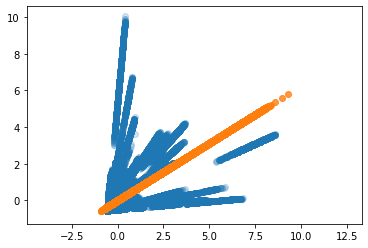

In [23]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [24]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(X)
print(X.shape)
print(projected.shape)

(205501, 14)
(205501, 2)


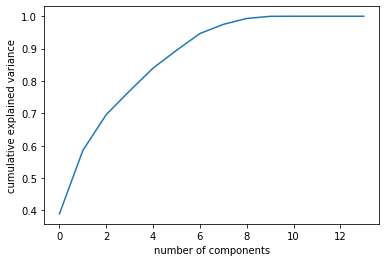

In [27]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# PCA labeld by industry / sector

In [30]:
df_features = df[['Sector','Price','MV','VA','VO','DY'] + ff]
df_features.dropna(inplace=True)

y = df_features['Sector']
y

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


15        Transportation & Logistics
16        Transportation & Logistics
17        Transportation & Logistics
18        Transportation & Logistics
19        Transportation & Logistics
                     ...            
208159            Media & Publishing
208160            Media & Publishing
208161            Media & Publishing
208162            Media & Publishing
208163            Media & Publishing
Name: Sector, Length: 205501, dtype: object

In [35]:
X = df_features.drop(['Sector'], axis=1)

In [36]:
sc = MinMaxScaler()
X_scaled = sc.fit_transform(X)

In [37]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(X_scaled)
print(X_scaled.shape)
print(projected.shape)

(205501, 14)
(205501, 2)


In [54]:
colorkey = y.unique()
colordict = {}
for i, v in enumerate(colorkey):
    colordict[v] = i
colordict

{'Transportation & Logistics': 0,
 'Information & Communication Technology': 1,
 'Finance & Securities': 2,
 'Property Development': 3,
 'Energy & Utilities': 4,
 'Banking': 5,
 'Health Care Services': 6,
 'Commerce': 7,
 'Media & Publishing': 8,
 'Construction Services': 9,
 'Insurance': 10,
 'Food & Beverage': 11,
 'Tourism & Leisure': 12,
 'Electronic Components': 13,
 'Construction Materials': 14,
 'Agribusiness': 15,
 'Petrochemicals & Chemicals': 16,
 'Packaging': 17}

In [55]:
y = y.map(colordict)

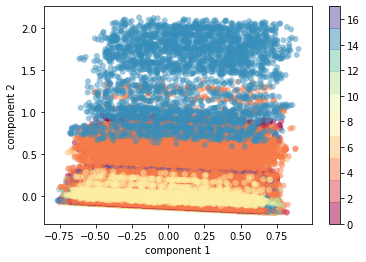

In [57]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();